# Intiating and loading libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# global_path="/content/drive/MyDrive/our_data"
global_path="/content/drive/MyDrive/Colab Notebooks/Speech transcription"

%cd $global_path 

/content/drive/MyDrive/Colab Notebooks/Speech transcription


In [ ]:
!pip install pyarabic

In [ ]:
# !unzip wav_data.zip

In [ ]:
# load libraries
import os
import wave
import pandas as pd
import numpy as np
import librosa
from IPython.display import Audio
import matplotlib.pyplot as plt
import pyarabic.araby as araby
import seaborn as sb
%matplotlib inline
pd.set_option('display.max_colwidth', None)



# Normalize audio (no need to run it now!!!!)
  Seriously it's gonna take long ,don't !!!!

In [ ]:
# import soundfile as sf

# def resample_audio(dir,sr_new):                                                                                                                                                                                       
#     subdirs = [x[0] for x in os.walk(dir)]                                                                            
#     for subdir in subdirs:                                                                                            
#         files = os.walk(subdir).__next__()[2]                                                                             
#         if (len(files) > 0):                                                                                          
#             for file in files:
#               try:
#                 audio_path=os.path.join(subdir, file)
#                 if audio_path[-3:] == 'wav':
#                   print(audio_path)  
#                   y, sr= librosa.load(audio_path,sr=None)
#                   if sr != sr_new:
#                     y_hat = librosa.resample(y, sr, sr_new, res_type='kaiser_best')
#                     sf.write(audio_path, y_hat, sr_new)
#               except:
#                 print("error")
  

In [ ]:
# down=8000
# up=44100
# resample_audio(wav_path,down)

# Loading and intial filtering of data

In [ ]:
wav_path=os.path.join(global_path,"wav_data_8000")
transcript_path=os.path.join(global_path,"transcripts")

In [ ]:
print(wav_path)

/content/drive/MyDrive/Colab Notebooks/Speech transcription/wav_data_8000


In [ ]:
df=pd.read_csv(transcript_path+"/dataset_1.csv",encoding='utf-8')

# the new column names
mapping={"Folder":"folder",
         "Pre.":"pre",
         "Seg.":"seg",
         "Bytes":"bytes",
         "Duration (s)":"duration_s",
         "Transcription":"transcription_words",
         "Filler":"filler",
         "File":"file_name"}

df.rename(mapping,inplace=True,axis=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   folder               4572 non-null   int64  
 1   pre                  4572 non-null   int64  
 2   seg                  4572 non-null   int64  
 3   bytes                4572 non-null   object 
 4   duration_s           4572 non-null   float64
 5   transcription_words  4572 non-null   object 
 6   filler               151 non-null    object 
 7   file_name            4572 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 285.9+ KB


In [ ]:
df["bytes"]=df["bytes"].apply(lambda x:x.replace(",",'')).astype('int') # convert the bytyes column from string to integer after removing the commas

In [ ]:
df1=pd.read_csv(transcript_path+"/rev2_9463.fileids",header=None,encoding='utf-8')
df2=pd.read_csv(transcript_path+"/rev2_9463_csv.csv",header=None,encoding='utf-8')
df3=pd.read_csv(transcript_path+"/syl_9463.txt",header=None,encoding='utf-8')
df1.rename({0:"path"},inplace=True,axis=1)
df2.rename({0:"file_name",1:"transcription_words"},inplace=True,axis=1)
df3.rename({0:"transcription_sylls"},inplace=True,axis=1)
df_main=pd.concat([df1,df2,df3],axis=1)

In [ ]:
df_main.head()

,path,file_name,transcription_words,transcription_sylls
0,1/1-1.wav,1-1.wav,اِرْتَفَعَتِ الْأَسْهُم ِالْكُوَيتِيَّةْ اِرْتِفَاعًا طَفِيفًا الْيَومِ السَّبْتْ,ءِرْ تَ فَ عَ تِلْ ءَسْ ھُ مُلْ كُ وَيْ تِيْ يَهْ ءِرْ تِ فَاْ عَنْ طَ فِيْ فَ نِلْ يَوْ مِسْ سَبْتْ
1,1/1-2.wav,1-2.wav,أَوَّلِ أَيَّامِ التَّدَاوِلِ بَعْدَ عُطْلَةٍ اِسْتَمَرَّتْ خَمْسَةَ أَيَّامْ,ءَوْ وَ لِ ءَيْ يَاْ مِتْ تَ دَاْ وِ لِ بَعْ دَ عُطْ لَ تِنْ ءِسْ تَ مَرْ رَتْ خَمْ سَ تَ ءَيْ يَاْمْ
2,1/1-3.wav,1-3.wav,مَدْعُومَةً بِأَنْبَاءٍ طَيِّبَةٍ مِنْ شَرِكَاتِ كُبْرَى,مَدْ عُوْ مَ تَمْ بِ ءَمْ بَاْ ءِنْ طَيْ يِ بَ تِمْ مِنْ شَ رِ كَاْ تِ كُبْ رَى
3,2/2-01.wav,2-01.wav,مَجَالِ الْإِصْلَاحَاتِ السِّيَاسِيَّةْ,مَ جَاْ لِلْ ءِصْ لَاْ حَاْ تِسْ سِ يَاْ سِيْ يَهْ
4,2/2-02.wav,2-02.wav,لِمُتَابَعَةِ الْمُفَاوَضَاتْ مَعَ مِصْرْ,لِ مُ تَاْ بَ عَ تِلْ مُ فَاْ وَ ضَ اِتْ مَ عَ مِصْرْ


In [ ]:
df.head()

,folder,pre,seg,bytes,duration_s,transcription_words,filler,file_name
0,906,906,1,121320,3.8,خَصَّصَت أَكثَر مِن ثَمَانِيَة وَثَلاثِينَ مِليَارَ رِيَال,NaN,906-01.wav
1,907,907,1,167206,5.2,وَتُسَاهِم المُنَظَّمَة بِنَحوِ ثُلُثِ إِجمَالِيِّ الإِنتَاج العَالَمِيِّ مِن النِّفط,NaN,907-01.wav
2,908,908,1,273018,8.5,اِفتُتِحَ مَعرَضَ الخُرطُوم الدَّولِيِّ لِلكِتَاب وَالَّذِي يَحتَوِي عَلَى أَكثَر مِن مَليُون عُنوَان لِلكُتُب مِن بَينِهَا الثَّقَافِيَّة وَالعِلمِيَّة وَالجَامِعِيَّة,NaN,908-01.wav
3,909,909,1,147310,4.6,أَمَّا فِي الأُردُن فَقَد تَمَّ وَضعُ بَرنَامِج ضَخم لِتَطوِير مَدِينَةِ العَقَبَة,NaN,909-01.wav
4,910,910,1,114990,3.6,وَذَلِكَ بِصَالَةِ نَادِي المُعَاقِين الكُوَيتِيِّ,NaN,910-01.wav


# Data exploration and correction

In [ ]:
df.head()

,folder,pre,seg,bytes,duration_s,transcription_words,filler,file_name
0,906,906,1,121320,3.8,خَصَّصَت أَكثَر مِن ثَمَانِيَة وَثَلاثِينَ مِليَارَ رِيَال,NaN,906-01.wav
1,907,907,1,167206,5.2,وَتُسَاهِم المُنَظَّمَة بِنَحوِ ثُلُثِ إِجمَالِيِّ الإِنتَاج العَالَمِيِّ مِن النِّفط,NaN,907-01.wav
2,908,908,1,273018,8.5,اِفتُتِحَ مَعرَضَ الخُرطُوم الدَّولِيِّ لِلكِتَاب وَالَّذِي يَحتَوِي عَلَى أَكثَر مِن مَليُون عُنوَان لِلكُتُب مِن بَينِهَا الثَّقَافِيَّة وَالعِلمِيَّة وَالجَامِعِيَّة,NaN,908-01.wav
3,909,909,1,147310,4.6,أَمَّا فِي الأُردُن فَقَد تَمَّ وَضعُ بَرنَامِج ضَخم لِتَطوِير مَدِينَةِ العَقَبَة,NaN,909-01.wav
4,910,910,1,114990,3.6,وَذَلِكَ بِصَالَةِ نَادِي المُعَاقِين الكُوَيتِيِّ,NaN,910-01.wav


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   path                 9463 non-null   object
 1   file_name            9463 non-null   object
 2   transcription_words  9463 non-null   object
 3   transcription_sylls  9463 non-null   object
dtypes: object(4)
memory usage: 295.8+ KB


In [ ]:
df[df.filler.notnull()].filler.value_counts()

!INH      116
!NOISE     35
Name: filler, dtype: int64

## Making sure both data frames are consistant with one another

In [ ]:
df.sort_values("file_name",inplace=True)
df_main.sort_values("file_name",inplace=True)

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9463 entries, 0 to 1847
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   path                 9463 non-null   object
 1   file_name            9463 non-null   object
 2   transcription_words  9463 non-null   object
 3   transcription_sylls  9463 non-null   object
dtypes: object(4)
memory usage: 369.6+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4572 entries, 1365 to 4316
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   folder               4572 non-null   int64  
 1   pre                  4572 non-null   int64  
 2   seg                  4572 non-null   int64  
 3   bytes                4572 non-null   int64  
 4   duration_s           4572 non-null   float64
 5   transcription_words  4572 non-null   object 
 6   filler               151 non-null    object 
 7   file_name            4572 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 321.5+ KB


In [ ]:
# convert the types
df['file_name']=df['file_name'].astype('string')
df_main['file_name']=df_main['file_name'].astype('string')


In [ ]:
df.head()

,folder,pre,seg,bytes,duration_s,transcription_words,filler,file_name
1365,1,1,1,112150,3.5,اِرتَفَعَت الأَسهُم الكُوَيتِيَّة اِرتِفَاعَا طَفِيفًا اليَوم السَّبت,NaN,1-1.wav
2653,1,1,2,131026,4.1,فِي أَوَّلِ أَيَامِ التَدَاوِلِ بَعدَ عُطلَةٍ اِستَمَرَّت خَمسَةَ أَيَّام,NaN,1-2.wav
3440,1,1,3,111560,3.5,مَدعُومَةً بِأََنبَاءٍ طَيِّبَةٍ مِن شَرِكَاتٍ كُبرَى,NaN,1-3.wav
36,10,10,1,116646,3.6,قَالَ نَائِبُ مُحَافِظُ البَنكِ المَركَزِيِّ الإِيرَانِيِّ إِنَّ بِلاَدَهُ,NaN,10-01.wav
187,10,10,2,131170,4.1,لَن تَنَقَلَ أَموَالهَاَ مِن حِسَابَاتِهَا الأُورُوبِيَّة إِلَى آسيَا,NaN,10-02.wav


In [ ]:
df_main.head()

,path,file_name,transcription_words,transcription_sylls
0,1/1-1.wav,1-1.wav,اِرْتَفَعَتِ الْأَسْهُم ِالْكُوَيتِيَّةْ اِرْتِفَاعًا طَفِيفًا الْيَومِ السَّبْتْ,ءِرْ تَ فَ عَ تِلْ ءَسْ ھُ مُلْ كُ وَيْ تِيْ يَهْ ءِرْ تِ فَاْ عَنْ طَ فِيْ فَ نِلْ يَوْ مِسْ سَبْتْ
1,1/1-2.wav,1-2.wav,أَوَّلِ أَيَّامِ التَّدَاوِلِ بَعْدَ عُطْلَةٍ اِسْتَمَرَّتْ خَمْسَةَ أَيَّامْ,ءَوْ وَ لِ ءَيْ يَاْ مِتْ تَ دَاْ وِ لِ بَعْ دَ عُطْ لَ تِنْ ءِسْ تَ مَرْ رَتْ خَمْ سَ تَ ءَيْ يَاْمْ
2,1/1-3.wav,1-3.wav,مَدْعُومَةً بِأَنْبَاءٍ طَيِّبَةٍ مِنْ شَرِكَاتِ كُبْرَى,مَدْ عُوْ مَ تَمْ بِ ءَمْ بَاْ ءِنْ طَيْ يِ بَ تِمْ مِنْ شَ رِ كَاْ تِ كُبْ رَى
133,10/10-01.wav,10-01.wav,قَالَ نَائِبُ مُحَافِظِ الْبَنْكِ الْمَرْكَزِيِّ الْإِيرَانِيّ إِنَّ بِلَادَهُ,قَاْ لَ نَاْ ءِ بُ مُ حَاْ فِ ظِلْ بَنْ كِلْ مَرْ كَ زِيْ يِلْ ءِيْ رَاْ نِيْي ءِنْ نَ بِ لَاْ دَهْ
134,10/10-02.wav,10-02.wav,لَنْ تَنْقُلَ أَمْوَالَهَا مِنْ حِسَابَاتِهَا الْأُورُوبِيَّةْ إِلَى آسِيَا,لَنْ تَنْ قُ لَ ءَمْ وَاْ لَ ھَاْ مِنْ حِ سَاْ بَاْ تِ ھَاْلْ ءُوْ رُوْ بِيْ يَهْ ءِ لَىآ سِ يَاْ


In [ ]:
df_main["bytes"]=df_main["path"].apply(lambda x:os.path.getsize(os.path.join(wav_path,x)))
df_main["duration"]=df_main["path"].apply(lambda x:librosa.get_duration(filename=os.path.join(wav_path,x)))

In [ ]:
df_main["transcription_sylls"]=df_main["transcription_sylls"].apply(lambda x:x.replace("UKN!","").replace("!UKN","").replace("!NOISE","").replace("!INH","").replace("\t",''))
df_main["transcription_words"]=df_main["transcription_words"].apply(lambda x:x.replace("UKN!","").replace("!UKN","").replace("!NOISE","").replace("!INH","").replace("\t",''))

In [ ]:
def getFiller(sentence:str)->str:
  if "$" in sentence:
    return "!UKN"
  elif "%" in sentence:
    return "!NOISE"
  elif "#" in sentence:
    return "!INH"

In [ ]:
df_main["filler_sylls"]=df_main["transcription_sylls"].apply(getFiller)
df_main["filler_words"]=df_main["transcription_words"].apply(getFiller)

In [ ]:
df_main.describe()

,bytes
count,9463.000000
mean,90080.863574
std,53451.846965
min,9858.000000
25%,51914.000000
50%,74542.000000
75%,112899.000000
max,352218.000000


In [ ]:
str_list=df_main['transcription_words'].to_list()
one_str=''.join(str_list)
unique=set(one_str)
print(len(unique))
print(unique)
with open('alphabet_words.txt', 'w') as f:
    for char in unique:
        f.write(f'{char}\n')

46
{'ْ', 'ئ', 'ـ', 'ظ', 'خ', 'ؤ', 'ض', 'ج', 'ش', 'ب', 'ح', 'إ', 'ث', 'ّ', 'ن', 'ع', 'ٍ', 'ه', ' ', 'ص', 'ِ', 'ط', 'أ', 'م', 'غ', 'س', 'ك', 'ت', 'ُ', 'ذ', 'ً', 'ى', 'ا', 'ٌ', 'آ', 'ق', 'ل', 'ة', 'ر', 'ء', 'و', 'د', 'ف', 'ي', 'ز', 'َ'}


In [ ]:
str_list=df_main['transcription_sylls'].to_list()
one_str=''.join(str_list)
unique=set(one_str)
print (len(unique))
print(unique)
with open('alphabet_sylls.txt', 'w') as f:
    for char in unique:
        f.write(f'{char}\n')

39
{'ْ', 'ظ', 'خ', 'ض', 'ج', 'ش', 'ھ', 'ب', 'ح', 'ث', 'ّ', 'ن', 'ع', 'ه', ' ', 'ص', 'ِ', 'ط', 'م', 'غ', 'س', 'ك', 'ت', 'ُ', 'ذ', 'ى', 'ا', 'آ', 'ق', 'ل', 'ة', 'ء', 'ر', 'و', 'د', 'ف', 'ي', 'ز', 'َ'}


In [ ]:
def getSamplingRate(path):
   with wave.open(os.path.join(wav_path,path), "rb") as wave_file:
        return wave_file.getframerate()

In [ ]:
df_main["sampling_rate"]=df_main['path'].apply(getSamplingRate)


#Correlation between length of the word and the time


In [ ]:
df_main["chars_num"]=df_main['transcription_words'].apply(lambda x:len(x))
df_main["sylls_num"]=df_main['transcription_words'].apply(lambda x:len(x.split(" ")))

In [ ]:
df_main.head()

,path,file_name,transcription_words,transcription_sylls,bytes,filler_sylls,filler_words,chars_num,sylls_num
0,1/1-1.wav,1-1.wav,اِرْتَفَعَتِ الْأَسْهُم ِالْكُوَيتِيَّةْ اِرْتِفَاعًا طَفِيفًا الْيَومِ السَّبْتْ,ءِرْ تَ فَ عَ تِلْ ءَسْ ھُ مُلْ كُ وَيْ تِيْ يَهْ ءِرْ تِ فَاْ عَنْ طَ فِيْ فَ نِلْ يَوْ مِسْ سَبْتْ,56098,None,None,81,7
1,1/1-2.wav,1-2.wav,أَوَّلِ أَيَّامِ التَّدَاوِلِ بَعْدَ عُطْلَةٍ اِسْتَمَرَّتْ خَمْسَةَ أَيَّامْ,ءَوْ وَ لِ ءَيْ يَاْ مِتْ تَ دَاْ وِ لِ بَعْ دَ عُطْ لَ تِنْ ءِسْ تَ مَرْ رَتْ خَمْ سَ تَ ءَيْ يَاْمْ,65536,None,None,77,8
2,1/1-3.wav,1-3.wav,مَدْعُومَةً بِأَنْبَاءٍ طَيِّبَةٍ مِنْ شَرِكَاتِ كُبْرَى,مَدْ عُوْ مَ تَمْ بِ ءَمْ بَاْ ءِنْ طَيْ يِ بَ تِمْ مِنْ شَ رِ كَاْ تِ كُبْ رَى,55802,None,None,56,6
133,10/10-01.wav,10-01.wav,قَالَ نَائِبُ مُحَافِظِ الْبَنْكِ الْمَرْكَزِيِّ الْإِيرَانِيّ إِنَّ بِلَادَهُ,قَاْ لَ نَاْ ءِ بُ مُ حَاْ فِ ظِلْ بَنْ كِلْ مَرْ كَ زِيْ يِلْ ءِيْ رَاْ نِيْي ءِنْ نَ بِ لَاْ دَهْ,58346,None,None,78,8
134,10/10-02.wav,10-02.wav,لَنْ تَنْقُلَ أَمْوَالَهَا مِنْ حِسَابَاتِهَا الْأُورُوبِيَّةْ إِلَى آسِيَا,لَنْ تَنْ قُ لَ ءَمْ وَاْ لَ ھَاْ مِنْ حِ سَاْ بَاْ تِ ھَاْلْ ءُوْ رُوْ بِيْ يَهْ ءِ لَىآ سِ يَاْ,65608,None,None,75,8


# Visualization

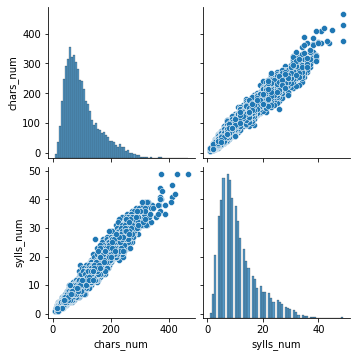

In [ ]:
# sb.pairplot(df_main[['bytes','duration','chars_num','sylls_num','sampling_rate']]);
sb.pairplot(df_main[['chars_num','sylls_num']]);


In [ ]:
df_main['sampling_rate'].value_counts()


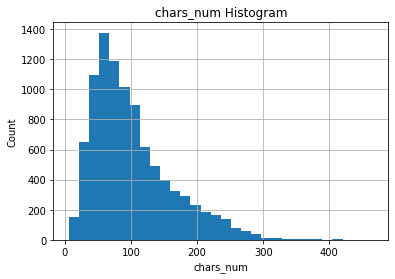

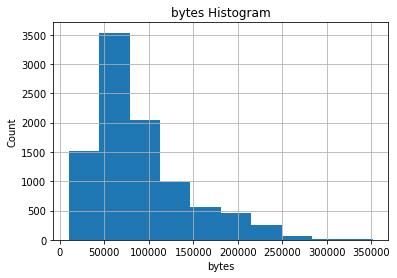

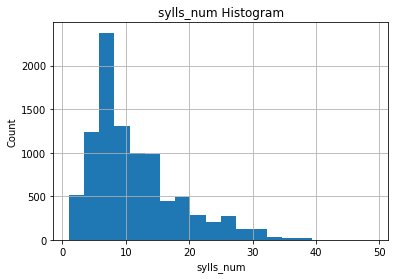

In [ ]:
# plt.figure()
# df_main['sampling_rate'].hist();
# plt.title("sampling_rate Histogram")
# plt.xlabel("sampling_rate")
# plt.ylabel("Count")
# plt.show()



plt.figure()
df_main['chars_num'].hist(bins=30);
plt.title("chars_num Histogram")
plt.xlabel("chars_num")
plt.ylabel("Count")
plt.show()

plt.figure()
df_main['bytes'].hist();
plt.title("bytes Histogram")
plt.xlabel("bytes")
plt.ylabel("Count")
plt.show()

# plt.figure()
# df_main['duration'].hist();
# plt.title("duration Histogram")
# plt.xlabel("duration")
# plt.ylabel("Count")
# plt.show()

plt.figure()
df_main['sylls_num'].hist(bins=20);
plt.title("sylls_num Histogram")
plt.xlabel("sylls_num")
plt.ylabel("Count")
plt.show()


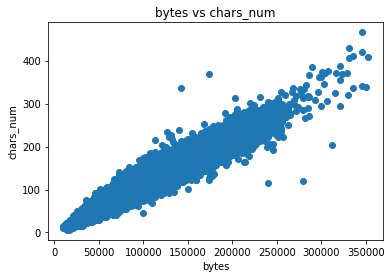

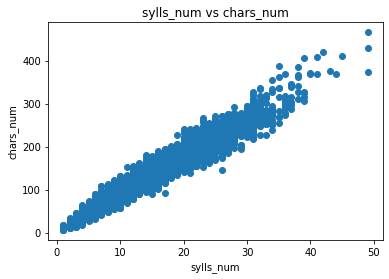

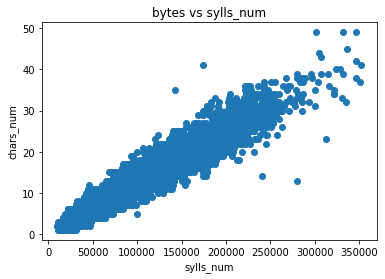

In [ ]:
# plt.figure()
# plt.scatter(df_main["duration"],df_main["chars_num"]);
# plt.title("duration vs chars_num")
# plt.xlabel("duration")
# plt.ylabel("chars_num")
# plt.show()

plt.figure()
plt.scatter(df_main["bytes"],df_main["chars_num"]);
plt.title("bytes vs chars_num")
plt.xlabel("bytes")
plt.ylabel("chars_num")
plt.show()

plt.scatter(df_main["sylls_num"],df_main["chars_num"]);
plt.title("sylls_num vs chars_num")
plt.xlabel("sylls_num")
plt.ylabel("chars_num")
plt.show()

plt.scatter(df_main["bytes"],df_main["sylls_num"]);
plt.title("bytes vs sylls_num")
plt.xlabel("sylls_num")
plt.ylabel("chars_num")
plt.show()

# plt.scatter(df_main["bytes"],df_main["duration"]);
# plt.title("bytes vs duration")
# plt.xlabel("duration")
# plt.ylabel("chars_num")
# plt.show()


In [ ]:
df_main.head()

## listen to a sample

In [ ]:
sample=df_main.sample(1)
test_file_path=sample['path'].values[0]
print(sample['transcription_sylls'])
print(sample['transcription_words'])
Audio(filename=os.path.join(wav_path,test_file_path))

In [ ]:
# sample=df_main[df_main['filler_sylls']=='!NOISE'].sample(1)
# test_file_path=sample['path'].values[0]
# print(sample['transcription_sylls'])
# print(sample['transcription_words'])
# Audio(filename=os.path.join(wav_path,test_file_path))

In [ ]:
# sample=df_main[df_main['filler_sylls']=='!UKN'].sample(1)
# test_file_path=sample['path'].values[0]
# print(sample['transcription_sylls'])
# print(sample['transcription_words'])
# Audio(filename=os.path.join(wav_path,test_file_path))

In [ ]:
# sample=df_main[df_main['filler_sylls']=='!INH'].sample(1)
# test_file_path=sample['path'].values[0]
# print(sample['transcription_sylls'])
# print(sample['transcription_words'])
# Audio(filename=os.path.join(wav_path,test_file_path))

# Train test split

In [ ]:
mapper_words={"path":"wav_filename",
        "bytes":"wav_filesize",
        "transcription_words":"transcript"}
mapper_sylls={"path":"wav_filename",
        "bytes":"wav_filesize",
        "transcription_sylls":"transcript"}
df_words=df_main[['path','bytes','transcription_words']].rename(mapper_words,axis=1)
df_sylls=df_main[['path','bytes','transcription_sylls']].rename(mapper_sylls,axis=1)

In [ ]:
df_sylls.head()

In [ ]:
validate_test,train = np.split(df_words.sample(frac=1, random_state=42), [2000])
validate,test = np.split(validate_test.sample(frac=1, random_state=42), [1000])
train.to_csv(os.path.join(wav_path,"train_words.csv"),header=True,index=False)
validate.to_csv(os.path.join(wav_path,"validate_words.csv"),header=True,index=False)
test.to_csv(os.path.join(wav_path,"test_words.csv"),header=True,index=False)

In [ ]:
validate_test,train = np.split(df_sylls.sample(frac=1, random_state=42), [2000])
validate,test = np.split(validate_test.sample(frac=1, random_state=42), [1000])
train.to_csv(os.path.join(wav_path,"train_sylls.csv"),header=True,index=False)
validate.to_csv(os.path.join(wav_path,"validate_sylls.csv"),header=True,index=False)
test.to_csv(os.path.join(wav_path,"test_sylls.csv"),header=True,index=False)


In [ ]:
train.info();
validate.info();
test.info();

In [ ]:
train.head(50)